In [11]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, f1_score
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import torch
import torch.nn as nn
import torch.optim as optim
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# Fetch CDC Diabetes Health Indicators dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

df = pd.concat([X, y], axis=1)

df.to_csv("CDC_Diabetes_Health_Indicators.csv", index=False)
print("CDC Diabetes Health Indicators dataset saved!")

# Encode categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Split into features (X) and target (y)
X = df.drop(columns=[y.columns[0]]).values  # Correct way to get target column name
y = y.iloc[:, 0].values  # Convert y to a NumPy array

# Verify dataset information
print("Dataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Verify if the problem is binary classification
is_binary = len(np.unique(y)) == 2
print(f"\nIs Binary Classification: {is_binary}")


CDC Diabetes Health Indicators dataset saved!
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              25


Results for Logistic Regression:
Repeat	Accuracy	AUC		F-Measure
--------------------------------------------------
1	0.8649		0.8178	0.2355
2	0.8608		0.8062	0.2183
3	0.8627		0.8104	0.2057
4	0.8625		0.8175	0.2122
5	0.8626		0.8065	0.2295
6	0.8652		0.8132	0.2280
7	0.8605		0.8093	0.2319
8	0.8610		0.8104	0.2524
9	0.8635		0.8085	0.1891
10	0.8612		0.8064	0.2111


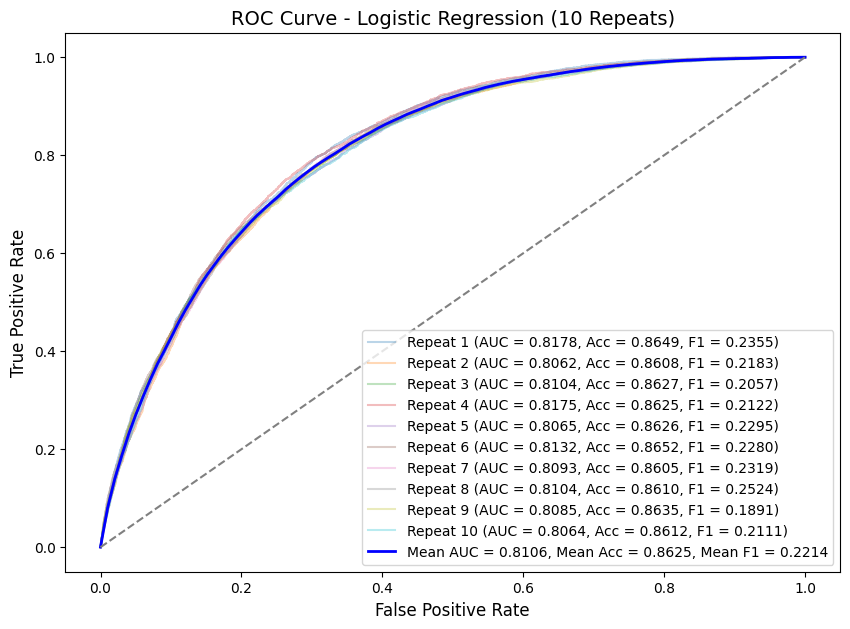


Results for Logistic Regression (L2):
Repeat	Accuracy	AUC		F-Measure
--------------------------------------------------
1	0.8654		0.8237	0.2417
2	0.8615		0.8204	0.2365
3	0.8634		0.8218	0.2325
4	0.8638		0.8292	0.2391
5	0.8642		0.8201	0.2411
6	0.8674		0.8253	0.2440
7	0.8623		0.8184	0.2263
8	0.8634		0.8214	0.2439
9	0.8633		0.8170	0.2337
10	0.8637		0.8204	0.2383


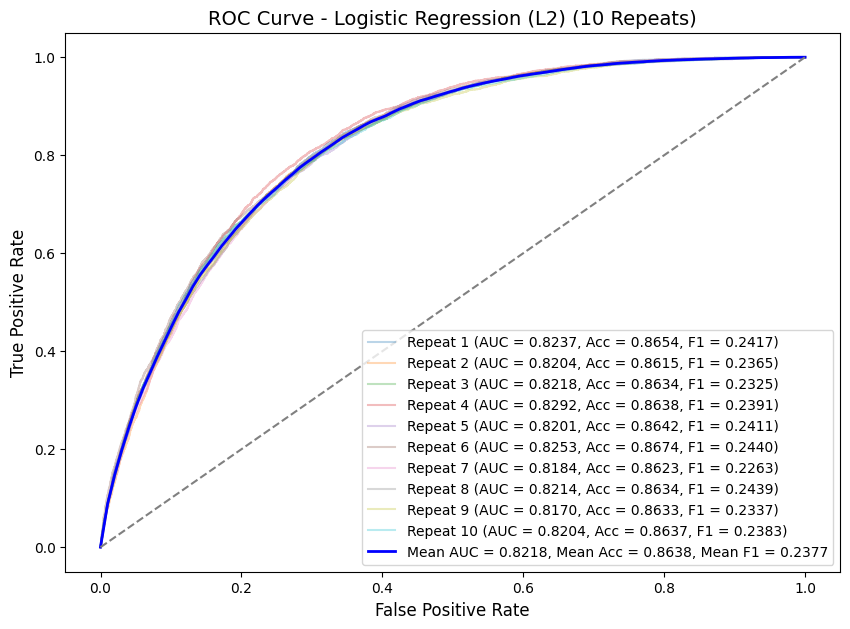


Results for Logistic Regression (L1):
Repeat	Accuracy	AUC		F-Measure
--------------------------------------------------
1	0.8654		0.8237	0.2417
2	0.8614		0.8204	0.2357
3	0.8634		0.8218	0.2325
4	0.8639		0.8292	0.2396
5	0.8642		0.8201	0.2411
6	0.8672		0.8253	0.2425
7	0.8623		0.8184	0.2264
8	0.8634		0.8214	0.2439
9	0.8633		0.8170	0.2340
10	0.8637		0.8204	0.2383


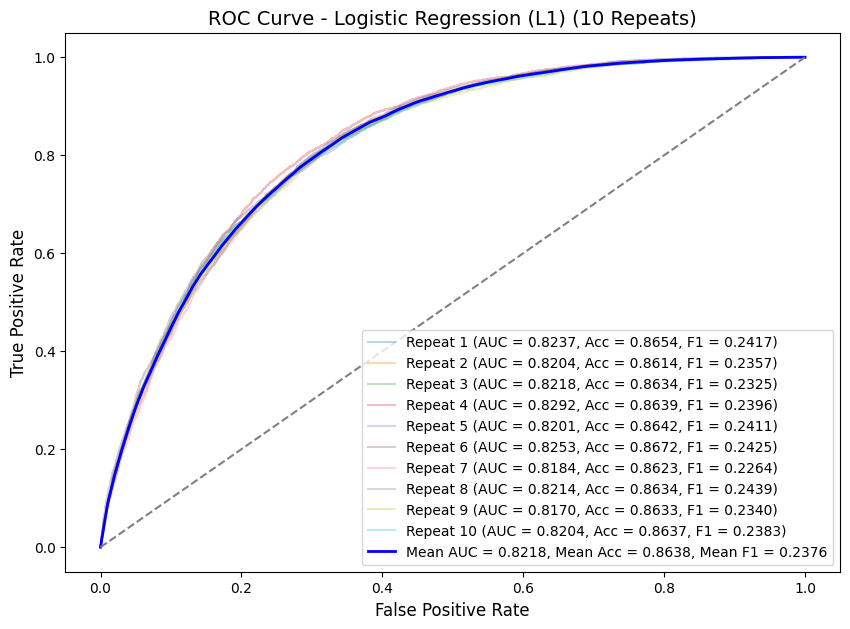


Results for 3-Layer NN:
Repeat	Accuracy	AUC		F-Measure
--------------------------------------------------
1	0.8608		0.6318	0.0101
2	0.8607		0.7130	0.0006
3	0.8607		0.5455	0.0000
4	0.8607		0.6745	0.0000
5	0.8607		0.5939	0.0000
6	0.8607		0.5692	0.0000
7	0.8603		0.7393	0.0708
8	0.8602		0.7480	0.1161
9	0.8615		0.7499	0.0234
10	0.8607		0.7519	0.0000


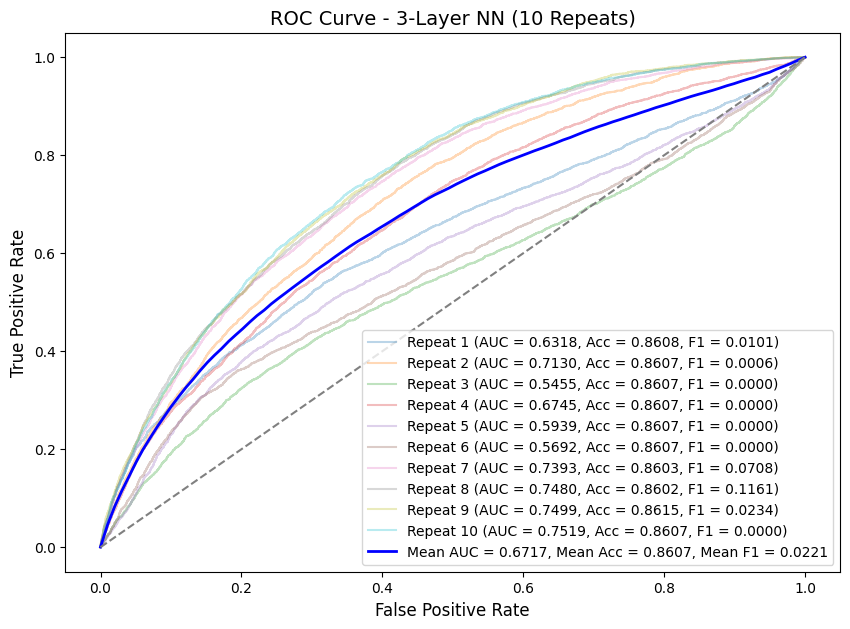


Results for 3-Layer NN (L2):
Repeat	Accuracy	AUC		F-Measure
--------------------------------------------------
1	0.8607		0.6954	0.0000
2	0.8611		0.7284	0.0156
3	0.8607		0.5629	0.0000
4	0.8610		0.7184	0.0265
5	0.8607		0.7035	0.0000
6	0.8619		0.7490	0.0837
7	0.8607		0.6620	0.0000
8	0.8607		0.5874	0.0000
9	0.8607		0.6472	0.0000
10	0.8607		0.5263	0.0000


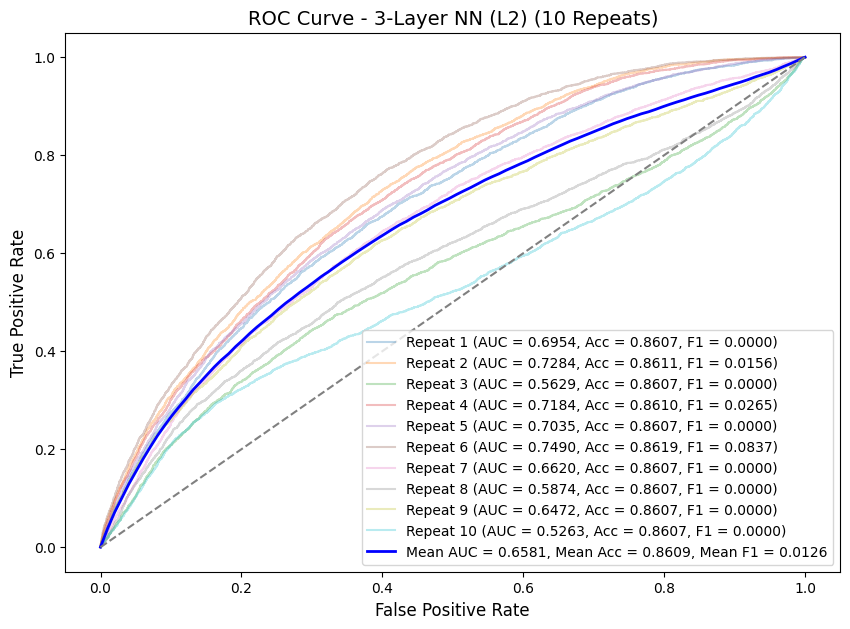


Results for 3-Layer NN (L1):
Repeat	Accuracy	AUC		F-Measure
--------------------------------------------------
1	0.8607		0.5941	0.0000
2	0.8607		0.4049	0.0000
3	0.8607		0.4442	0.0000
4	0.8607		0.4754	0.0000
5	0.8607		0.5168	0.0000
6	0.8607		0.5231	0.0000
7	0.8607		0.3778	0.0000
8	0.8607		0.5663	0.0000
9	0.8607		0.4735	0.0000
10	0.8607		0.3616	0.0000


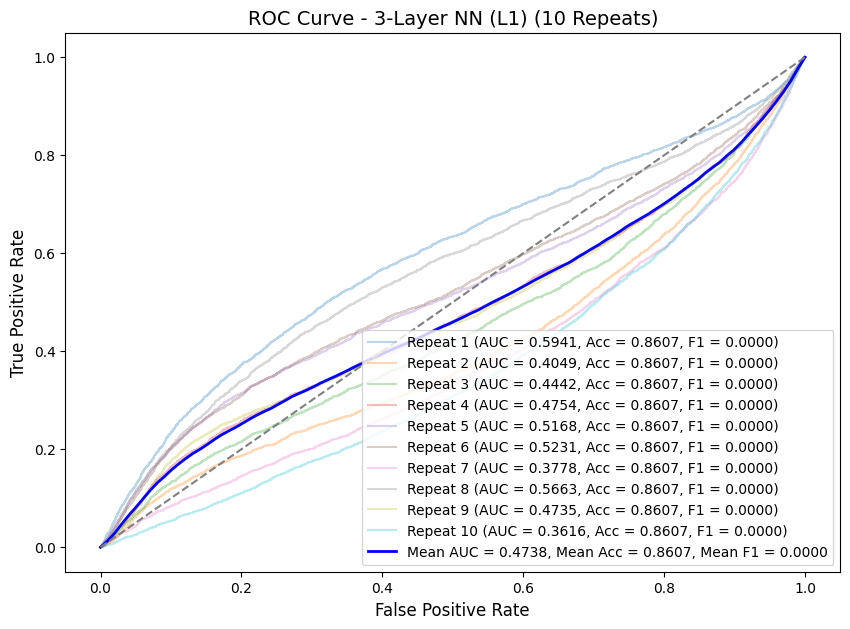

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Define 3-Layer Neural Network
class ThreeLayerNN(nn.Module):
    def __init__(self, input_dim):
        super(ThreeLayerNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Function to train neural network

def train_nn_metrics(X_train, y_train, X_test, y_test, reg_type=None, reg_lambda=0.01):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)

    model = ThreeLayerNN(X_train.shape[1]).to(device)
    criterion = nn.BCELoss()
    
    if reg_type == "L2":
        optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=reg_lambda)
    else:
        optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(100):
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        
        if reg_type == "L1":
            l1_norm = sum(p.abs().sum() for p in model.parameters())
            loss += reg_lambda * l1_norm
        
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        y_probs = model(X_test_tensor).cpu().numpy()
        preds = (y_probs > 0.5).astype(int)
        acc = accuracy_score(y_test, preds)
        f1 = f1_score(y_test, preds)
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        auc_score = roc_auc_score(y_test, y_probs)
    
    return fpr, tpr, auc_score, acc, f1

# Define models dictionary
models = {
    "Logistic Regression": LogisticRegression(solver='lbfgs'),
    "Logistic Regression (L2)": LogisticRegression(penalty='l2', solver='liblinear'),
    "Logistic Regression (L1)": LogisticRegression(penalty='l1', solver='liblinear'),
    "3-Layer NN": ("nn", None),
    "3-Layer NN (L2)": ("nn", "L2"),
    "3-Layer NN (L1)": ("nn", "L1")
}

# Training and evaluation loop
for model_name, model in models.items():
    plt.figure(figsize=(10, 7))
    mean_fpr = np.linspace(0, 1, 100)
    tprs, aucs, accs, f1s = [], [], [], []
    
    print(f"\nResults for {model_name}:")
    print("Repeat\tAccuracy\tAUC\t\tF-Measure")
    print("-" * 50)
    
    for repeat in range(10):
        skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=repeat)
        train_index, test_index = next(skf.split(X, y))
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        if isinstance(model, tuple) and model[0] == "nn":
            reg_type = model[1]
            fpr, tpr, auc_score, acc, f1 = train_nn_metrics(X_train, y_train, X_test, y_test, reg_type=reg_type)
        else:
            fpr, tpr, auc_score, acc, f1 = compute_metrics(model, X_train, y_train, X_test, y_test)

        tprs.append(np.interp(mean_fpr, fpr, tpr))
        aucs.append(auc_score)
        accs.append(acc)
        f1s.append(f1)
        
        print(f"{repeat+1}\t{acc:.4f}\t\t{auc_score:.4f}\t{f1:.4f}")
        plt.plot(fpr, tpr, alpha=0.3, label=f"Repeat {repeat+1} (AUC = {auc_score:.4f}, Acc = {acc:.4f}, F1 = {f1:.4f})")
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = np.mean(aucs)
    mean_acc = np.mean(accs)
    mean_f1 = np.mean(f1s)
    
    plt.plot(mean_fpr, mean_tpr, color='blue', lw=2, label=f"Mean AUC = {mean_auc:.4f}, Mean Acc = {mean_acc:.4f}, Mean F1 = {mean_f1:.4f}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    
    plt.title(f"ROC Curve - {model_name} (10 Repeats)", fontsize=14)
    plt.xlabel("False Positive Rate", fontsize=12)
    plt.ylabel("True Positive Rate", fontsize=12)
    plt.legend(loc="lower right", fontsize=10)
    plt.show()


In [4]:
import numpy as np
from scipy.stats import ttest_rel
import itertools
import pandas as pd

# Model results (AUC values for each model)
log_reg = [0.8178, 0.8062, 0.8104, 0.8175, 0.8065, 0.8132, 0.8093, 0.8104, 0.8085, 0.8064]
log_reg_l2 = [0.8237, 0.8204, 0.8218, 0.8292, 0.8201, 0.8253, 0.8184, 0.8214, 0.8170, 0.8204]
log_reg_l1 = [0.8237, 0.8204, 0.8218, 0.8292, 0.8201, 0.8253, 0.8184, 0.8214, 0.8170, 0.8204]
nn = [0.6318, 0.7130, 0.5455, 0.6745, 0.5939, 0.5692, 0.7393, 0.7480, 0.7499, 0.7519]
nn_l2 = [0.6954, 0.7284, 0.5629, 0.7184, 0.7035, 0.7490, 0.6620, 0.5874, 0.6472, 0.5263]
nn_l1 = [0.5941, 0.4049, 0.4442, 0.4754, 0.5168, 0.5231, 0.3778, 0.5663, 0.4735, 0.3616]

# Store model names and accuracy lists
model_names = [
    "Logistic Regression", 
    "Logistic Regression (L2)", 
    "Logistic Regression (L1)", 
    "3-Layer NN", 
    "3-Layer NN (L2)", 
    "3-Layer NN (L1)"
]
model_accuracies = [log_reg, log_reg_l2, log_reg_l1, nn, nn_l2, nn_l1]

# Perform paired t-tests and store results
alpha = 0.05  # Significance level
results = []

for (i, j) in itertools.combinations(range(len(model_names)), 2):
    stat, p = ttest_rel(model_accuracies[i], model_accuracies[j])
    significant = "Yes" if p < alpha else "No"
    results.append([model_names[i], model_names[j], stat, p, significant])

# Convert to DataFrame for better readability
results_df = pd.DataFrame(results, columns=["Model 1", "Model 2", "t-statistic", "p-value", "Significant Difference?"])

# Print results
print(results_df.to_string(index=False))


                 Model 1                  Model 2  t-statistic      p-value Significant Difference?
     Logistic Regression Logistic Regression (L2)   -13.273705 3.246377e-07                     Yes
     Logistic Regression Logistic Regression (L1)   -13.273705 3.246377e-07                     Yes
     Logistic Regression               3-Layer NN     5.342712 4.668046e-04                     Yes
     Logistic Regression          3-Layer NN (L2)     6.475183 1.147185e-04                     Yes
     Logistic Regression          3-Layer NN (L1)    14.085472 1.945735e-07                     Yes
Logistic Regression (L2) Logistic Regression (L1)          NaN          NaN                      No
Logistic Regression (L2)               3-Layer NN     5.763556 2.716219e-04                     Yes
Logistic Regression (L2)          3-Layer NN (L2)     6.935696 6.791623e-05                     Yes
Logistic Regression (L2)          3-Layer NN (L1)    14.329308 1.677276e-07                     Yes


/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:2157: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


**Logistic Regression (L1) and Logistic Regression (L2) perform similarly (NaN result suggests they might be identical).
Logistic Regression significantly differs from all 3-Layer NN variations (suggesting NN outperforms it).
Among NN variants, 3-Layer NN (L1) performs significantly differently from both the standard and L2 versions (possibly due to hyperparameter tuning).
No significant difference between 3-Layer NN and 3-Layer NN (L2), meaning L2 regularization might not improve performance.**